In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [71]:
train = pd.read_csv('../open/train.csv)
test = pd.read_csv('../open/test.csv')

train.shape, test.shape

((598, 2881), (310, 2879))

In [72]:
def catcol(df):
    df['LINE_PROD'] = df['LINE'] + df['PRODUCT_CODE']
    
catcol(train)
catcol(test)

In [73]:
train_x = train.drop(columns=['PRODUCT_ID','LINE','PRODUCT_CODE','TIMESTAMP','Y_Quality','Y_Class'])
train_y = train['Y_Class']

test_x = test.drop(columns=['PRODUCT_ID','LINE','PRODUCT_CODE','TIMESTAMP'])

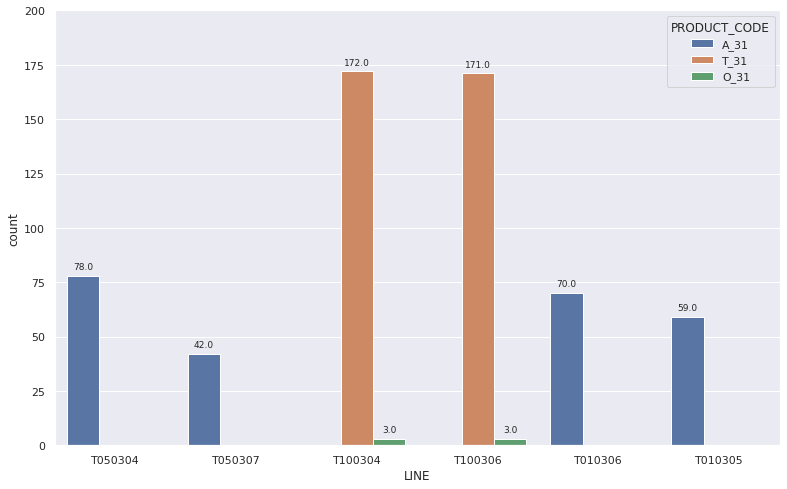

In [74]:
sns.set(rc = {'figure.figsize':(13,8)})
fig=sns.countplot(x=train['LINE'], hue=train['PRODUCT_CODE'])

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
fig.set_ylim(0, 200)
plt.show()

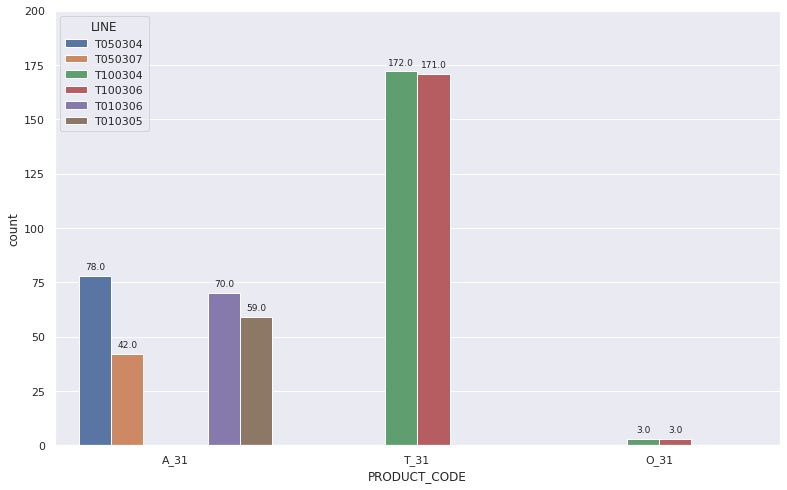

In [75]:
sns.set(rc = {'figure.figsize':(13,8)})
fig=sns.countplot(x=train['PRODUCT_CODE'], hue=train['LINE'])

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
fig.set_ylim(0, 200)
plt.show()

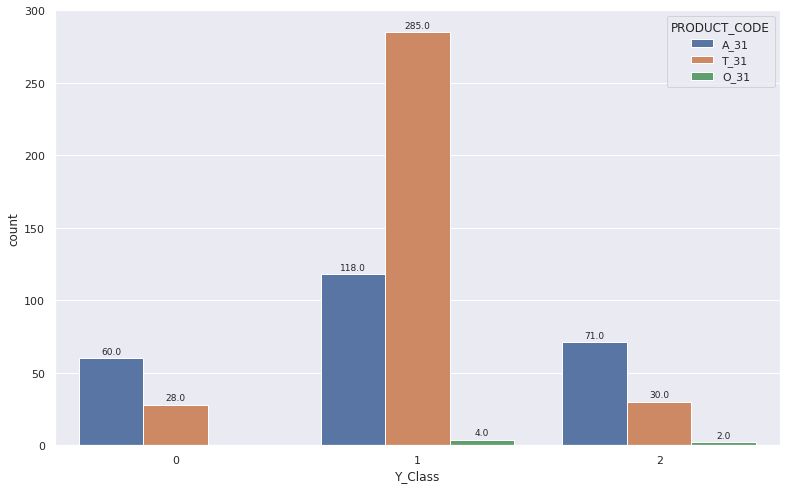

In [76]:
sns.set(rc = {'figure.figsize':(13,8)})
fig=sns.countplot(x=train['Y_Class'], hue=train['PRODUCT_CODE'])

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
fig.set_ylim(0, 300)
plt.show()

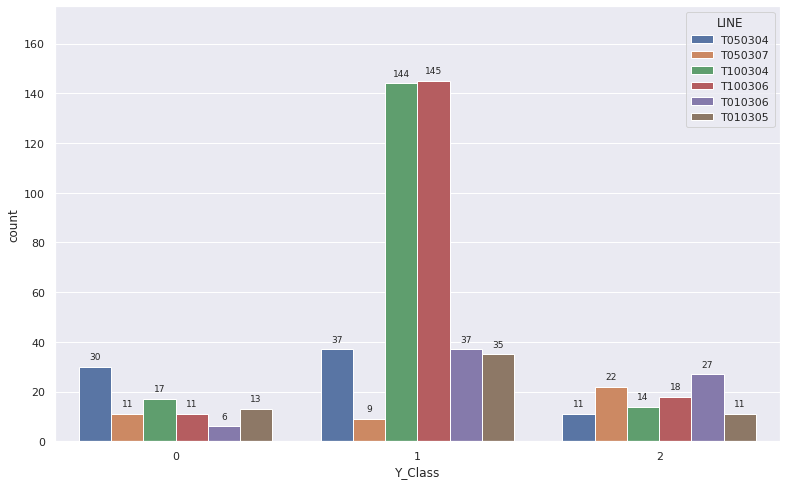

In [77]:
sns.set(rc = {'figure.figsize':(13,8)})
fig=sns.countplot(x=train['Y_Class'], hue=train['LINE'])

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
fig.set_ylim(0, 175)
plt.show()

In [78]:
train.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


In [79]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,243.000000,243.000000,243.0,243.0,243.000000,243.0,243.000000,243.000000,243.000000,243.0,...,34.000000,34.000000,34.000000,34.000000,34.000000,39.000000,9.000000,9.000000,9.000000,9.000000
mean,4.337449,94.448560,0.0,45.0,10.271605,0.0,48.485597,10.012346,42.407407,2.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.300000,228.844444
std,16.624229,4.062582,0.0,0.0,0.445705,0.0,3.733199,0.110651,10.482308,0.0,...,2.715660,4.431279,6.116252,3.419513,1.924128,0.160128,25.467305,20.078872,35.523689,19.514233
min,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,31.000000,2.0,...,44.410000,41.630000,39.850000,47.820000,60.720000,0.000000,199.000000,214.600000,169.700000,191.900000
25%,2.000000,91.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,31.000000,2.0,...,51.237500,50.095000,43.750000,52.170000,62.295000,1.000000,247.100000,253.900000,231.100000,232.800000
50%,2.000000,95.000000,0.0,45.0,10.000000,0.0,50.000000,10.000000,52.000000,2.0,...,51.810000,53.655000,51.175000,55.605000,63.170000,1.000000,258.700000,257.500000,261.700000,236.300000
75%,2.000000,97.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,52.000000,2.0,...,53.457500,55.957500,54.097500,56.642500,65.442500,1.000000,263.400000,261.300000,263.200000,239.700000
max,154.000000,102.000000,0.0,45.0,11.000000,0.0,67.000000,11.000000,52.000000,2.0,...,58.060000,60.490000,60.310000,58.290000,67.240000,1.000000,268.000000,278.600000,271.400000,245.600000


표준편차가 0 인것 -> 자료가 모두 평균과 동일하다. 

train 데이터의 X_2872 - X_2875 까지는 모두 NaN 인것을 알 수 있다.

In [80]:
min_x = 0
max_x = 0
min_col = 'X_1'
max_col = 'X_1'

for i in range(1, 2876):
    feature_num = 'X_' + str(i)
    tmp_min = train[feature_num].describe()['min']
    tmp_max = train[feature_num].describe()['max']
    if tmp_min < min_x:
        min_x = tmp_min
        min_col = feature_num
    if tmp_max > max_x:
        max_x = tmp_max
        max_col = feature_num

print(f'min : {min_col} = {min_x}')
print(f'max : {max_col} = {max_x}')

min : X_396 = -260.0
max : X_382 = 20200000000000.0


모든 공장 과정에서 추출되어 비식별화된 변수중 가장작은 값과 가장 큰 값을 뽑아내면, 그 차이가 매우 큰 것을 알 수 있다.

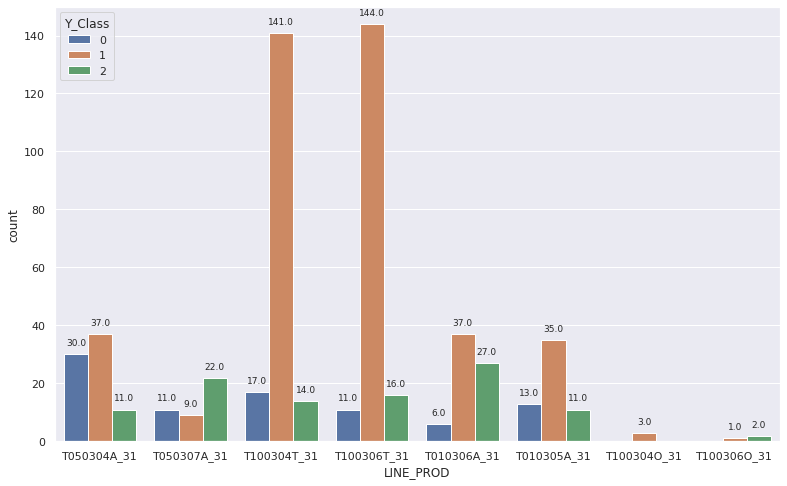

In [81]:
sns.set(rc = {'figure.figsize':(13,8)})
fig=sns.countplot(x=train['LINE_PROD'], hue=train['Y_Class'])

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
fig.set_ylim(0, 150)
plt.show()